# Heart Disease Analysis
---
### Notebook 1: Heart Disease Classification using Machine Learning

This project focuses on **Heart Disease Analysis**, presented across a series of Jupyter notebooks.  

1. In this notebook, we begin with a **smaller dataset** (Kaggle Heart Disease dataset: 303 samples, 14 features) to perform exploratory analysis and build baseline models.  
2. In the following notebook, we will extend the work to a **larger dataset** (e.g., the Framingham Heart Study) for deeper analysis and more robust modelling.  

More specifically, we'll look at the following topics.

| Step | What we'll cover |
|:-----|:-----|
| **Exploratory data analysis (EDA)** | The process of going through a dataset and discovering more about it. |
| **Model training**  | Create model(s) to learn to predict a target variable based on other variables. |
| **Model evaluation** | Evaluating a model's predictions using problem-specific evaluation metrics. |
| **Model comparison** | Comparing several different models to find the best one. |
| **Model hyperparameter tuning** | Once we've found a good model, can we tweak its hyperparameters to improve it? |
| **Feature importance** | Since we're predicting the presence of heart disease, are there some features/characteristics that are more important for prediction? |
| **Cross-validation** | If we do build a good model, can we be sure it will work on unseen data? |
| **Reporting what we've found** | If we had to present our work, what would we show someone? |

---
**Note:** 
- This notebook is inspired by the course *"Complete A.I. & Machine Learning, Data Science Bootcamp
"* available at: https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery 
---

In [1]:
import sklearn
import datetime
import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.metrics import RocCurveDisplay 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore")

In [2]:
# Current module versions.

print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

NumPy version: 2.1.3
pandas version: 2.3.2
matplotlib version: 3.10.5
Scikit-Learn version: 1.7.1


In [3]:
# loading data

df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dataset Description
---

This dataset contains **303 patient records** with **14 attributes** (13 features + 1 target).  
Below is the description of each variable:

- **age:** Age of the patient (in years).  
- **sex:** Gender of the patient:
   - 0 = Female  
   - 1 = Male  
- **cp** (Chest Pain type):  
   - 0 = Typical angina  
   - 1 = Atypical angina  
   - 2 = Non-anginal pain  
   - 3 = Asymptomatic  
- **trestbps:** Resting blood pressure (in mm Hg, on admission to the hospital).  
- **chol:** Serum cholesterol level (in mg/dl).  
- **fbs:** Fasting blood sugar (> 120 mg/dl):
   - 0 = False  
   - 1 = True  
- **restecg:** Resting electrocardiographic results:  
   - 0 = Normal  
   - 1 = Having ST-T wave abnormality  
   - 2 = Showing probable/definite left ventricular hypertrophy  
- **thalach:** Maximum heart rate achieved.  
- **exang:** Exercise-induced angina:  
   - 0 = No 
   - 1 = Yes   
- **oldpeak:** ST depression induced by exercise relative to rest (numeric, float).  
- **slope:** The slope of the peak exercise ST segment:  
    - 0 = Upsloping  
    - 1 = Flat  
    - 2 = Downsloping  
- **ca:** Number of major vessels (0–3) colored by fluoroscopy.  
- **thal:** Thalassemia:  
    - 0 = Normal  
    - 1 = Fixed defect  
    - 2 = Reversible defect  
- **target:** Diagnosis of heart disease:  
    - 0 = No heart disease  
    - 1 = Heart disease present  

---

### EDA has no real set methodolgy, the following is a short check list

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

---

### `1` represents Presence of heart disease and `0` represents No heart disease.

In [5]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
# proportion of each target variable.

df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

### The two values are close to even and our `target` variable can be considered **balanced**. 

- An **unbalanced** target variable, meaning some classes have far more samples, can be harder to model than a balanced set. 

### [`pd.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) provides a quick overview of missing values and the types of data in the dataset. In this case, there are no missing values, and all columns are numerical.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Another useful way to quickly summarise a DataFrame is with `pd.DataFrame.describe()`. This method provides key statistics for numerical columns, including measures such as mean, maximum, and standard deviation.”

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# finding the number of males and females in our study

df.sex.value_counts() #  sex: 1 represents male and 0 represents female.

sex
1    207
0     96
Name: count, dtype: int64

### Note:

- Target: `1` represents Presence of heart disease and `0` represents No heart disease.
- Sex: `1` represents male and `0` represents female.

In [10]:
# Compare target column with sex column

pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### Interpretation:
- From a total of 207 mens, 93 had heart disease (approx 45%).
- From a total of 96 womens, 72 had heart disease (75%).

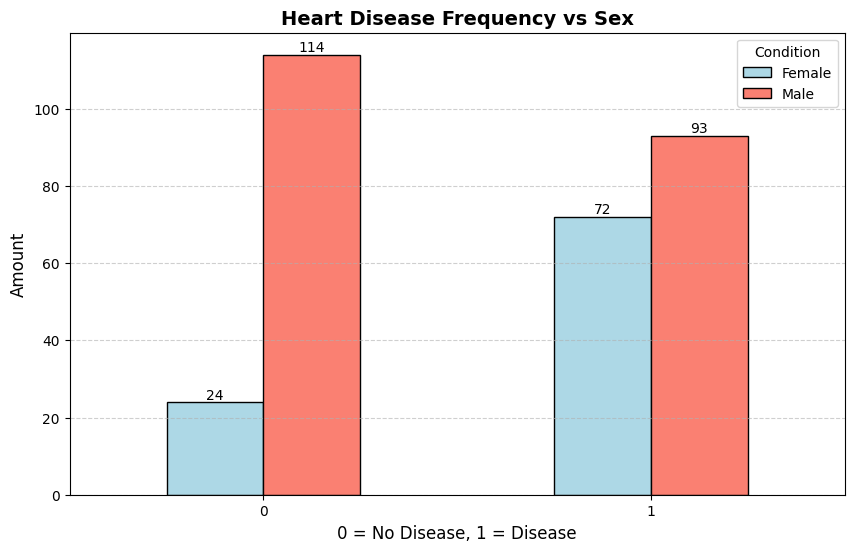

In [11]:
# Crosstab for chest pain type vs target
cp_crosstab = pd.crosstab(df.target, df.sex)

# Plot grouped bar chart
ax = cp_crosstab.plot(kind="bar", 
                      figsize=(10,6), 
                      color=["lightblue", "salmon"],
                      edgecolor="black")

plt.title("Heart Disease Frequency vs Sex", fontsize=14, fontweight="bold")
plt.xlabel("0 = No Disease, 1 = Disease", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend(["Female", "Male"], title="Condition")
plt.xticks(rotation=0)

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Comapring age and maximum heart rate

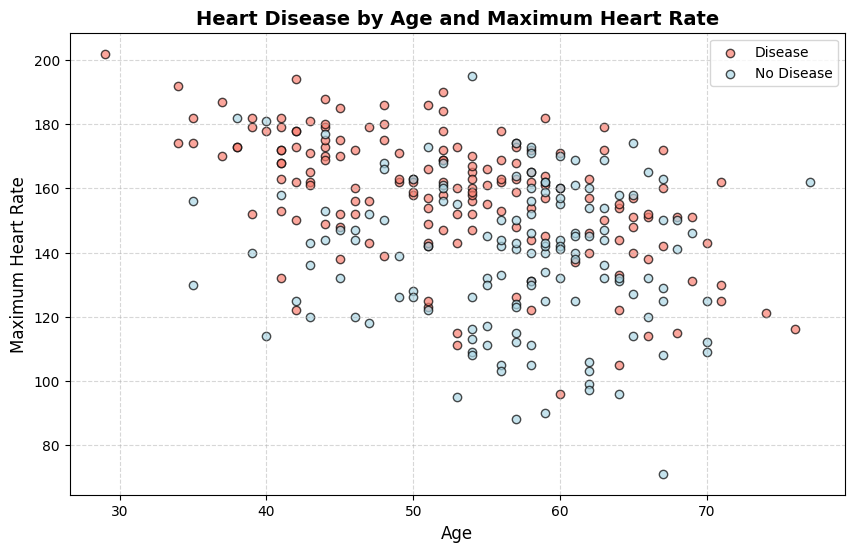

In [12]:
# Scatter plot: Age vs. Max Heart Rate, by Heart Disease presence

plt.figure(figsize=(10, 6))

# Positive examples (heart disease present)
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon",
            label="Disease",
            alpha=0.7,
            edgecolors="k")

# Negative examples (no heart disease)
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="lightblue",
            label="No Disease",
            alpha=0.7,
            edgecolors="k")

# Add labels and title
plt.title("Heart Disease by Age and Maximum Heart Rate", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Maximum Heart Rate", fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


### From the plot, it is evident 
- Maximum heart rate is more strongly associated with heart disease than age, since both younger and older individuals are affected.
- Notably, younger people with high maximum heart rates are among the most likely to have heart disease.
- Majority of patients with a maximum heart rate above 130 - 140 show evidence of heart disease.

### Comparing heart disease frequency and chest pain.
- `cp` represents chest pain in our dataset.
- It is a categorical variable with 4 categories representing Chest Pain type, 
> **0 (Typical angina):** Chest pain related to decreased blood supply to the heart (predictable, often triggered by exertion or stress).  
>
> **1 (Atypical angina):** Chest pain not following the typical pattern; may be less clearly linked to reduced blood flow.  
>
> **2 (Non-anginal pain):** Chest pain likely unrelated to the heart (e.g., musculoskeletal or gastrointestinal causes).  
>
> **3 (Asymptomatic):** No chest pain symptoms despite the presence of heart disease.  

In [13]:
pd.crosstab(index=df.cp, columns=df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


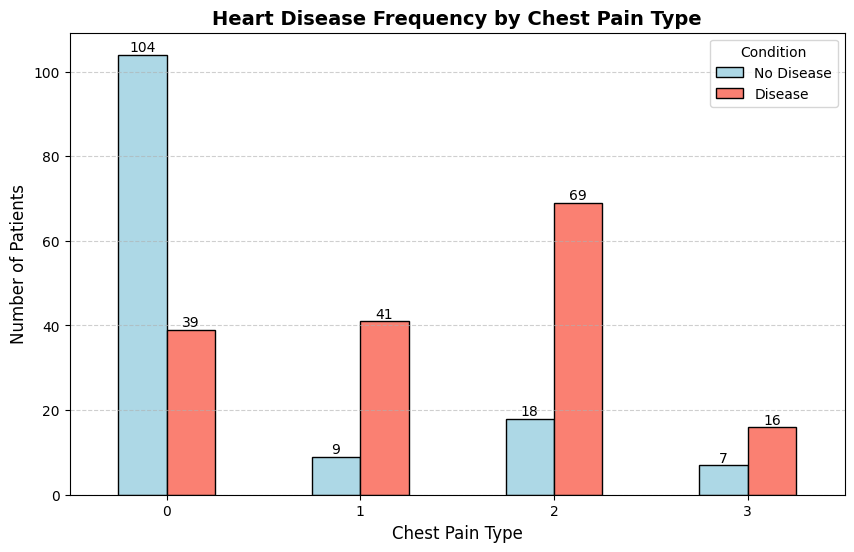

In [14]:
# Crosstab for chest pain type vs target
cp_crosstab = pd.crosstab(df.cp, df.target)

# Plot grouped bar chart
ax = cp_crosstab.plot(kind="bar", 
                      figsize=(10,6), 
                      color=["lightblue", "salmon"],
                      edgecolor="black")

plt.title("Heart Disease Frequency by Chest Pain Type", fontsize=14, fontweight="bold")
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.legend(["No Disease", "Disease"], title="Condition")
plt.xticks(rotation=0)

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### We can also compare all independent variables together by checking correlation between independent variables.

- We can do this using [`pd.DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) which will create a [**correlation matrix**](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices) for us, in other words, a big table of numbers telling us how related each variable is the other.
- **Note:**
> A **high correlation between target and predictor variables** is desired, as it indicates the predictor has strong explanatory power.
>   
> A **high correlation between predictor and predictor variables** is not desired, as it may lead to multicollinearity and reduce model reliability.  


In [15]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


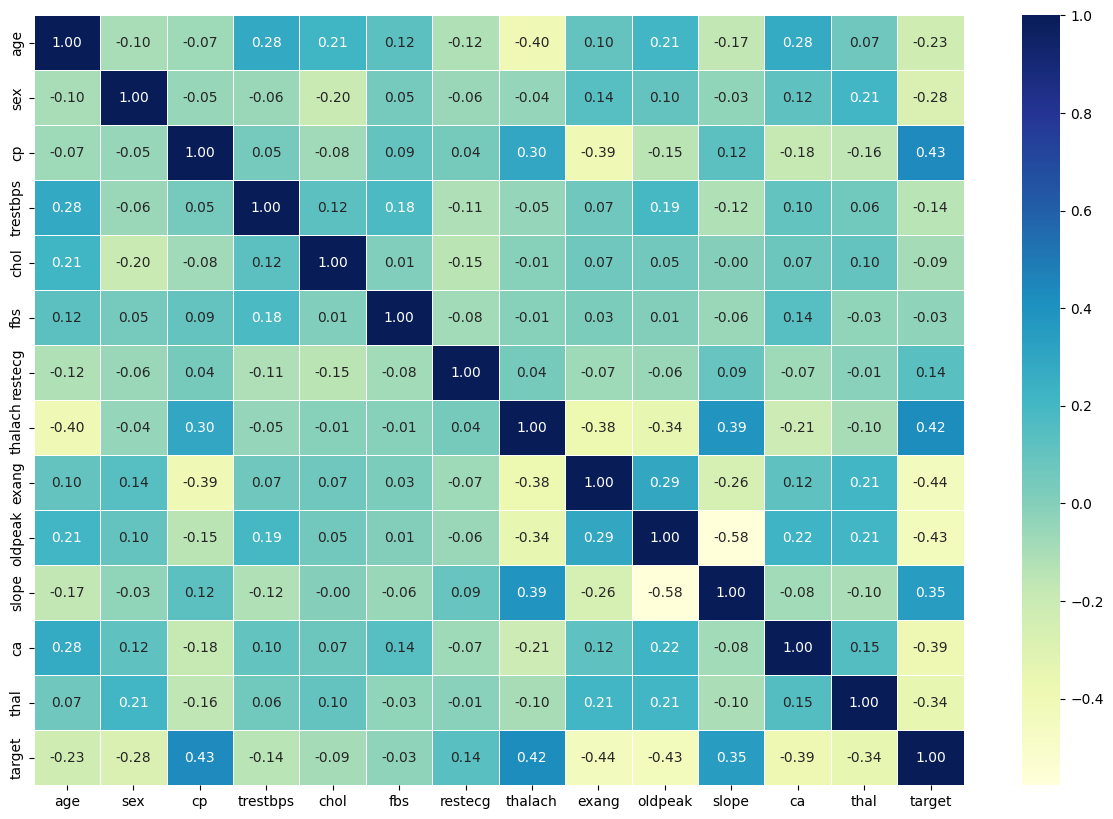

In [16]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## **Problem Statement:** Given clinical parameters about a patient, can we predict whether or not they have heart disease?

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **Note:**
- We're trying to predict our target variable using all of the other variables.

- To do this, we'll split the target variable from the rest. We can do this by creating:

> * `X` - Our features (all variables except the `target` column) using [`pd.DataFrame.drop(labels="target")`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).
>
> * `y` - Our target variable using [`df.target.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) (this will extract the `target` column as a NumPy array).

In [18]:
# Everything except target variable
X = df.drop(labels="target", axis=1)


# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
# Target variable
y = df.target.to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Creating a training and test split.

In [20]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [21]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [22]:
y_train, len(y_train), len(X_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242,
 242)

In [23]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [24]:
y_test, len(y_test), len(X_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 61,
 61)

## Model Building

We'll try the following models and compare their results.

## 1. Logistic Regression

- **Type**: Classification (binary or multiclass with OvR/softmax).
> Classification: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- **What it does**: Models the probability of class membership using the logistic (sigmoid) function.  

**When to use**  
- Classes are (approximately) linearly separable.  
- Need interpretability and class probabilities.  

**Important Parameters**  
- `penalty` → regularization type (`l1`, `l2`, `elasticnet`).  
- `C` → inverse of regularization strength (smaller = stronger regularization).  
- `solver` → optimization algorithm (`liblinear`, `saga`, etc.).  

**How parameters are selected**  
- Use **cross-validation** to find the best `C` and `penalty`.  
- Regularization strength often tuned with grid search (`C = [0.01, 0.1, 1, 10]`, etc.).
  
---

## 2. K-Nearest Neighbors (KNN)

- **Type**: Both classification and regression.
> Classification: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
>
> Regression: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- **What it does**: Predicts based on the labels/values of the *k* nearest neighbors using a distance metric.  

**When to use**  
- Small to medium datasets.  
- Nonlinear problems with complex decision boundaries.  

**Important Parameters**  
- `n_neighbors (k)` → number of neighbors.  
- `metric` → distance measure (Euclidean, Manhattan, Minkowski).  
- `weights` → uniform or distance-based weighting.  

**How parameters are selected**  
- The value of **k** is often chosen using the **Elbow Method**:  
  - Plot model error (e.g., misclassification rate) vs. different values of k.  
  - Look for the “elbow point” where adding more neighbors stops reducing error significantly.  
- Use **cross-validation** to confirm the best k.  
- Scaling is critical → always normalize/standardize features.  

---

## 3. Random Forest

- **Type**: Both classification and regression.
> Classification: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
>
> Regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- **What it does**: An ensemble of decision trees trained on bootstrapped data with feature randomness.  

**When to use**  
- Large, high-dimensional datasets.  
- Need robust performance and feature importance.  

**Important Parameters**  
- `n_estimators` → number of trees.  
- `max_depth` → depth of trees.  
- `max_features` → number of features considered at each split.  
- `min_samples_split` / `min_samples_leaf` → thresholds for splitting/leaves.  

**How parameters are selected**  
- **Grid search or Randomized search** with cross-validation to tune `n_estimators`, `max_depth`, etc.  
- Larger `n_estimators` generally improves stability (until diminishing returns).  
- Feature importance can guide **variable selection** (similar to PCA but model-driven).  

---

## 🔑 Interview Insights
- **Logistic Regression** → Use cross-validation to tune regularization; highly interpretable baseline.  
- **KNN** → Use elbow plot and cross-validation to choose k; sensitive to feature scaling.  
- **Random Forest** → Tune hyperparameters via grid/random search; provides built-in feature importance for selection.  


In [25]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_accuracies = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its accuracy to model_accuracy
        model_accuracies[name] = model.score(X_test, y_test)
    return model_accuracies

In [26]:
model_accuracies = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_accuracies

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

<Axes: >

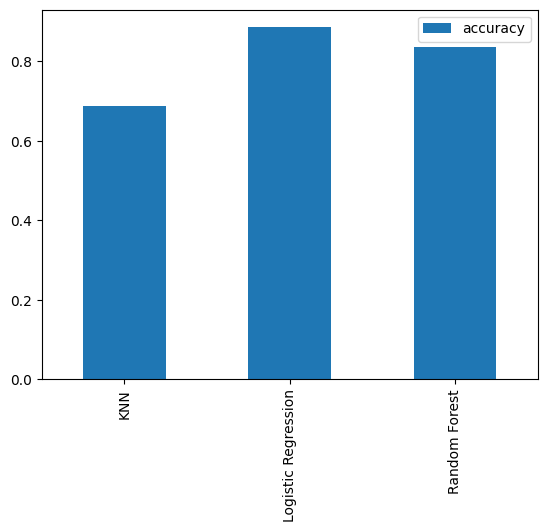

In [27]:
model_compare = pd.DataFrame(model_accuracies, index=['accuracy'])
model_compare.T.plot.bar()

### In terms of **accuracy**, our logistic regression model is performing the best. However, we have not performed any kind of parameter tuning, and used other classification metrics to evaluate our models.

---

| **Term** | **Definition** |
| :----- | :----- |
| **Hyperparameter tuning** | Many machine learning models have a series of settings/dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance. The practice of figuring out the best settings for a model is called hyperparameter tuning. |
| **Feature importance** | If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age? |
| [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | 
| [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) | Splits your dataset into multiple versions of training and test sets and trains/evaluations your model on each different version. This ensures that your evaluation metrics are across several different splits of data rather than a single split (if it was only a single split, you might get lucky and get better than usual results, the same for the reverse, if you get a poor split, you might find your metrics lower than they should be). | 
| [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of samples. Higher precision leads to fewer false positives. |  
[**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of true positives and false negatives. Higher recall leads to fewer false negatives. |
| [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) | Combines precision and recall into one metric. 1 is best, 0 is worst. |
| [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) | Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score. |
| [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) | [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate. A perfect curve will follow the left and top border of a plot. | 
| [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) | The area underneath the ROC curve. A perfect model achieves a score of 1.0. |

### Tuning KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

- There are several hyperparameters we can tune for the K-Nearest Neighbors (KNN) algorithm (or [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

- Let's start with one, the number of neighbors. The default is 5 (`n_neigbors=5`).

In [28]:
train_scores, test_scores = [], []

neighbors = range(1, 21) # testing 1 to 20 values for neighbors.

# Setup KNN algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [29]:
pd.DataFrame({"train accuracy": train_scores, "test accuracy": test_scores})

,train accuracy,test accuracy
0,1.000000,0.622951
1,0.809917,0.639344
2,0.772727,0.655738
3,0.743802,0.672131
4,0.760331,0.688525
5,0.752066,0.721311
6,0.743802,0.704918
7,0.723140,0.688525
8,0.719008,0.688525
9,0.694215,0.704918


Maximum KNN score on the test data: 75.41%


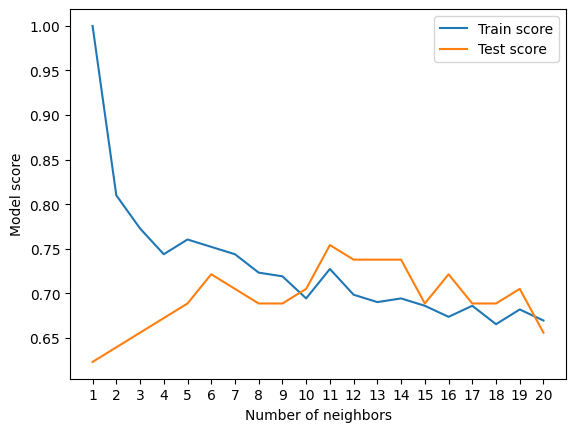

In [30]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

- ### K=1 achieved 100% accuracy, it is a classic case of overfitting where model learns too much from the data and fails to generalis on the data it has not seen before.
- ### K = 11 (index 10) seems like a good value, as testing accuracy is the highest and not too much off from the training accuracy.
- ### Also, our KNN model doesn't got even close to our Logistic model results.

---
## Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

- Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

In [31]:
%%time

# Setup random seed
np.random.seed(42)


# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "saga"]}


# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 173 ms, sys: 1.08 ms, total: 174 ms
Wall time: 173 ms


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear', 'saga']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### The result from our tuned logistic regression model is very similar to the one we got before *without* any hyperparameter tuning.

> **Note:** Many of the algorithms in Scikit-Learn have pretty good default hyperparameter values so don't be surprised if they perform pretty good on your data straight out of the box. But don't take this as being true all the time. Just because the default hyperparameters perform pretty well on your data doesn't mean there aren't a better set of hyperparameter values out there.

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [34]:
%%time 

# Setup random seed
np.random.seed(42)

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 18.6 s, sys: 159 ms, total: 18.8 s
Wall time: 18.8 s


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [35]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [36]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Evaluating Models: Logistic Regression vs Random Forest

- Although our `LogisticRegression` model shows slightly better accuracy (about 2% higher) compared to `RandomForestClassifier`, accuracy alone is **not sufficient** for evaluating this problem.

---

#### Example: Diagnostic Test for Heart Disease
- **False Positive (Type I Error):** The model predicts disease when the patient does not actually have it.  
  - Consequence: The person undergoes further testing; while inconvenient, this is not life-threatening.  

- **False Negative (Type II Error):** The model predicts healthy when the patient actually has the disease.  
  - Consequence: The person does not seek further treatment, which can be dangerous or even fatal.  

---

### Why Accuracy Is Not Enough
- A model with high accuracy may still misclassify critical cases.  
- In healthcare diagnostics, **minimizing false negatives** is far more important than maximizing overall accuracy.

---

### Better Evaluation Metrics
- **Recall (Sensitivity / True Positive Rate):** Measures how many actual positives are correctly identified.  
  - Key metric when false negatives are costly.  
- **Precision:** Measures how many predicted positives are actually correct.  
- **F1-score:** Harmonic mean of precision and recall, balances both.  
- **ROC-AUC:** Useful for comparing classifiers across thresholds.


| Metric/Evaluation Technique | Scikit-Learn method/documentation |
| ----- | ----- |
| ROC curve and AUC score | [`sklearn.metrics.RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) |
| Confusion matrix | [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) |
| Classification report | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |
| Precision | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) | 

---

✅ **Key Insight:**  
In life-critical applications like disease detection, the *best model* is not necessarily the one with the highest accuracy, but the one with the **lowest false negative rate** (highest recall).

---

### Note:

- These evaluation metrics are designed compare model predictions to the ground truth data.

- So, we'll have to use our model to make predictions on the test set. 

- We can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

> **Note:** When making predictions with a trained model, the data you're trying to predict on must be in the same format your model was trained on. For example, if a model was trained with data formatted in a certain way, it's important to make future predictions on data formatted in that same way. 

---

###  First, we can further tune our  `LogisticRegression` and `RandomForestClassifier` model using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

- The difference between `RandomizedSearchCV` and `GridSearchCV` is: 

> [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) searches over a grid of hyperparameters performing `n_iter` combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
>
>  [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a hyperparameter tuning technique where you specify a set of values for each hyperparameter, and the algorithm exhaustively tests all possible combinations of those values to find the best-performing set (usually based on cross-validation). This is a thorough test but it takes quite a long time.
>
> **Note:** If there are a large number of hyperparameter combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

--- 

## **Grid Search on `LogisticRegression`**

In [37]:
%%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "saga"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: user 333 ms, sys: 1.02 ms, total: 334 ms
Wall time: 333 ms


In [38]:
# Check the best parameters
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [39]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [40]:
y_preds = gs_log_reg.predict(X_test) # Make preidctions on test data

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### ROC Curve and AUC Scores

- What's a ROC curve?
> It's a way of understanding how our model is performing by comparing the true positive rate to the false positive rate.

- Scikit-Learn implements a function `RocCurveDisplay` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

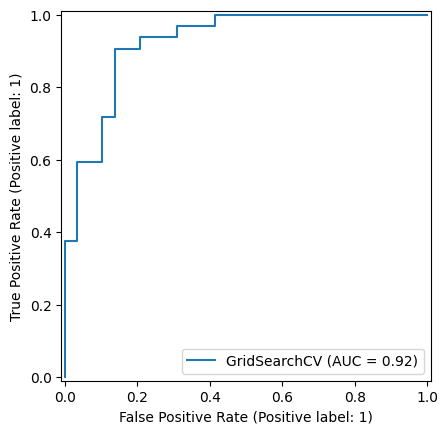

In [43]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, # from_estimator() = use a model to plot ROC curve on data
                               X=X_test, 
                               y=y_test); 

- Our model AUC is 0.92, a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.
--- 
### Confusion matrix

In [44]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


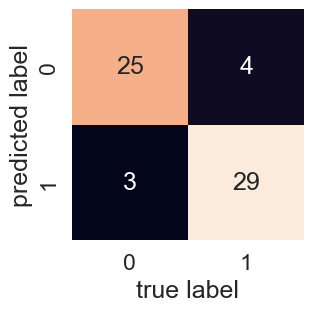

In [45]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification report

- A classification report is a collection of different metrics and other details.

- We can make a classification report using [`sklearn.metrics.classification_report(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels. 

- A classification report will also give us information on the precision and recall of our model for each class.

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## **GridSearch on `RandomForestClassifier`**

In [47]:
%%time 

# Setup random seed
np.random.seed(42)

# Different RandomForestClassifier hyperparameters

rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_grid,
    cv=2,
    verbose=True
)

gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 7200 candidates, totalling 14400 fits
CPU times: user 41min 14s, sys: 17 s, total: 41min 31s
Wall time: 41min 31s


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,2
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(10)


### In k-fold cross-validation, we used k=2 because k=5 was taking too much time. 
---

Example: 5-fold cross-validation (cv=5)

- If you have 1000 training samples and set cv=5:

- Data is split into 5 folds of 200 samples each.

- Model trains on 800 samples, validates on 200.

- This repeats 5 times, each time using a different fold as validation.

- Average score across folds = cross-validation score for that parameter setting.

In [48]:
# Check the best parameters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': np.int64(11),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(10)}

In [49]:
# Evaluate the model
gs_rf.score(X_test, y_test)

0.8852459016393442

In [50]:
y_preds = gs_rf.predict(X_test) # Make preidctions on test data

In [51]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [52]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

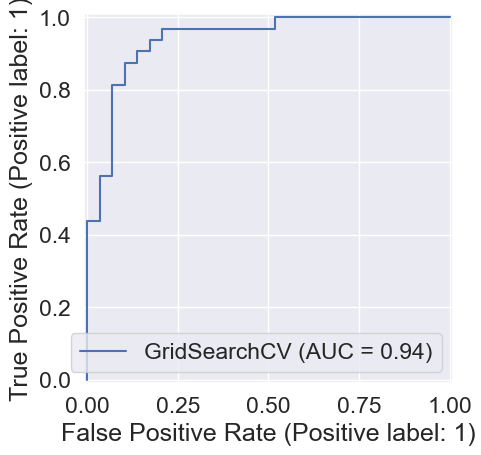

In [53]:
RocCurveDisplay.from_estimator(estimator=gs_rf, 
                               X=X_test, 
                               y=y_test); 

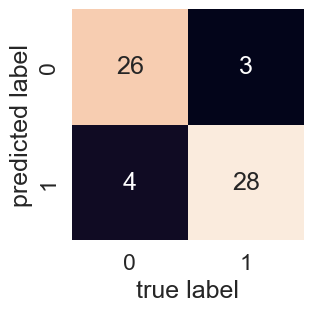

In [54]:
plot_conf_mat(y_test, y_preds)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



## The AUC of our random forest model is 0.94, better than the logistic regression model. However, it is to understand it took much more time to achieve this.

---

| **Metric/metadata** | **Explanation** | 
| ----- | ----- | 
| **Precision** | Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. |
| **Recall** | Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. |
| **F1 score** | A combination of precision and recall. A perfect model achieves an F1 score of 1.0. |
| **Support** | The number of samples each metric was calculated on. |
| **Accuracy** | The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. |
| **Macro avg** | Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric. |
| **Weighted avg** | Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples). |

---

- #### Random forest achieve higher recall **less false negative** in comparsion to logistic regression.
- #### It is also noteworthy, that our testing data have very few samples and the difference is very small.
- #### So, we can used cross_val_score and avg our results to further validate our findings.

### Taking the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

- `cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. 

- It then evaluates the machine learning model on the data and labels using cross-validation across `cv=5` (the default number of splits) splits and a defined `scoring` parameter.

In [56]:
# logistic regression best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [57]:
# random forest the best hyperparameters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': np.int64(11),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(10)}

In [58]:
# Instantiate logistic regression model with best hyperparameters (found with GridSearchCV)
clf_logistic = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [60]:
# Instantiate random forest model with best hyperparameters (found with GridSearchCV)
clf_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=11,
    min_samples_split=2,
    n_estimators=10
)

In [64]:
%%time

cv_logistic_acc = np.mean(cross_val_score(clf_logistic,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy")) # accuracy as scoring

cv_logistic_precision = np.mean(cross_val_score(clf_logistic,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring


cv_logistic_recall = np.mean(cross_val_score(clf_logistic,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

cv_logistic_f1 = np.mean(cross_val_score(clf_logistic,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring



cv_logistic_acc, cv_logistic_precision, cv_logistic_recall, cv_logistic_f1

CPU times: user 62.9 ms, sys: 2.55 ms, total: 65.4 ms
Wall time: 63.2 ms


(np.float64(0.8479781420765027),
 np.float64(0.8215873015873015),
 np.float64(0.9272727272727274),
 np.float64(0.8705403543192143))

In [65]:
%%time

cv_rf_acc = np.mean(cross_val_score(clf_rf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy")) # accuracy as scoring

cv_rf_precision = np.mean(cross_val_score(clf_rf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring


cv_rf_recall = np.mean(cross_val_score(clf_rf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

cv_rf_f1 = np.mean(cross_val_score(clf_rf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring



cv_rf_acc, cv_rf_precision, cv_rf_recall, cv_rf_f1

CPU times: user 138 ms, sys: 2.98 ms, total: 141 ms
Wall time: 140 ms


(np.float64(0.8084699453551913),
 np.float64(0.7959523809523809),
 np.float64(0.884848484848485),
 np.float64(0.8425267601357247))

### From this, it is clear that our logistic regression model performs better than our random forest model.

---
## Now, we can interpret our results and look for features (variables) that contribute most to our model.

In [66]:
# Fit an instance of LogisticRegression (taken from above)
clf_logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.23357214690901212
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [68]:
# Check coef_
clf_logistic.coef_

array([[ 0.00369922, -0.90424094,  0.67472825, -0.0116134 , -0.00170364,
         0.04787688,  0.33490202,  0.02472938, -0.6312041 , -0.57590972,
         0.47095153, -0.65165346, -0.69984212]])

In [69]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf_logistic.coef_[0])))
features_dict

{'age': np.float64(0.0036992219987868977),
 'sex': np.float64(-0.9042409356586161),
 'cp': np.float64(0.6747282473934053),
 'trestbps': np.float64(-0.011613399733807518),
 'chol': np.float64(-0.0017036437157196944),
 'fbs': np.float64(0.0478768767697894),
 'restecg': np.float64(0.3349020243959257),
 'thalach': np.float64(0.02472938207178759),
 'exang': np.float64(-0.6312040952883138),
 'oldpeak': np.float64(-0.575909718275565),
 'slope': np.float64(0.4709515257844554),
 'ca': np.float64(-0.6516534575992304),
 'thal': np.float64(-0.6998421177365038)}

<Axes: title={'center': 'Feature Importance'}>

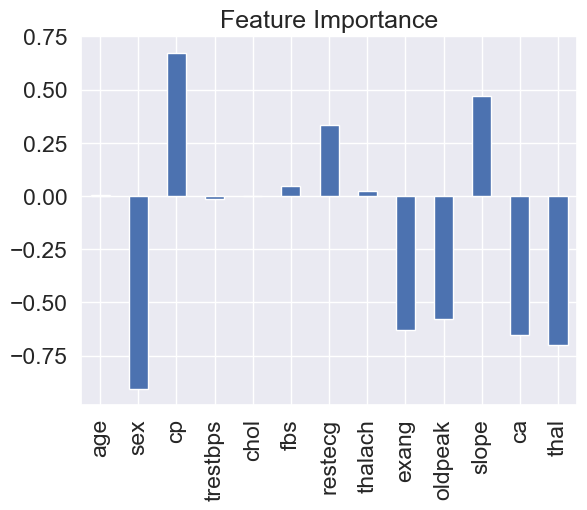

In [70]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False)

- Some are negative and some are positive.
- The larger the value (bigger bar), the more the feature contributes to the models decision.
- If the value is negative, it means there's a negative correlation. And vice versa for positive values. 
- For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.
- We can see this by comparing the `sex` column to the `target` column.

In [71]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


- It is evident, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

- So, as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

- What does this mean?

> It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [72]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


- According to the model, there's a positive correlation of 0.470, not as strong as `sex` and `target` but still more than 0.

- This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.